In [12]:
"""
In annealing the temperature is also increased sometimes. Should we do the same?
Should the temperature in simulated annealing decrease linearly?
Can we not get stuck in a local minimum by changing one parameter at a time? see picture '2dLocalMinima'
"""

"\nIn annealing the temperature is also increased sometimes. Should we do the same?\nShould the temperature in simulated annealing decrease linearly?\nCan we not get stuck in a local minimum by changing one parameter at a time? see picture '2dLocalMinima'\n"

In [13]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// from https://stackoverflow.com/questions/36757301/disable-ipython-notebook-autoscrolling
// disable scroll

<IPython.core.display.Javascript object>

In [14]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.metrics import mean_squared_error as detMSE

In [66]:
# differential equation for prey
def dx(alfa, x, beta, y):
    dx = alfa * x - beta * x * y
    return dx

# differential equation for predators
def dy(delta, x, y, gamma):
    dy = delta * x * y - gamma * y
    return dy

# solving differential equtions using Euler method
def EulerSolveODE(x,y,parameters, times):
    for month in times:
        xList.append(x)
        yList.append(y)    
        x += dx(parameters[0], x, parameters[1], y)
        y += dy(parameters[2], x, y, parameters[3]) 
        
def pend(f, t, a, b, c, d):
    x, y = f
    dfdt = [a*x - b*x*y, d*x*y - c*y]
    return dfdt

# randomly change one of the parameters 
# all change at equal probability
# the parameter is changed to a completely new number in the range
def changeParameter(parameters):
    randomNumber = np.random.random()
    if randomNumber < 1./4:
        parameters[0] += np.random.random() - 0.5
    elif randomNumber < 2./4:
        parameters[1] += np.random.random() - 0.5
    elif randomNumber < 3./4:
        parameters[2] += np.random.random() - 0.5
    else:
        parameters[3] += np.random.random() - 0.5
    return parameters

In [64]:
# import csv using pandas
# create 3 data lists: time, prey and predators
pandaFile = pandas.read_csv('predator-prey-data.csv')
times = []
xValues = []
yValues = []
for row in range(len(pandaFile['t'])):
    time = pandaFile['t'][row]
    x = pandaFile['x'][row]
    y = pandaFile['y'][row]
    times.append(time)
    xValues.append(x)
    yValues.append(y)

In [74]:
# using Euler
# prey and predators are float numbers

# initial guesses

# set the initial amount of prey and predators equal to those of the real data
x = xValues[0] #amount of prey
y = yValues[0] #amount of predators

# assign a random number to the parameters in the range
a = np.random.random()*5 #birth rate prey
b = np.random.random()*5 #prey catch rate
d = np.random.random()*5 #birth of predators per predator per prey
c = np.random.random()*5 #death rate predators
establishedParameters = [a,b,c,d]

# assign the cooling schedule
TMax = 10000
TMin = 1
temperatures = np.arange(TMax,TMin-1,-1)

# assign a high number to the mean squared error 
#hoping the first random guess of the parameters will lead to acceptance
mse = 999999999

# simulating annealing
for T in temperatures:
    
    #print(T)
    
    # set newParameters almost equal to establisedParameters
    # changing only 1 using the function changeParameter
    newParameters = changeParameter(establishedParameters)
    
    # calculate the amount of prey and predators for each time point indicated from data
    # assume all time point lie at equal distance
    xList = []
    yList = []
    
    y0 = [3, 3]
    
    sol = odeint(pend, y0, times, args=tuple(newParameters))
    
    #determine mse of prey and predators
    msePrey = detMSE(xValues, [el[0] for el in sol])
    msePredators = detMSE(yValues, [el[0] for el in sol])
    mseSum = msePrey + msePredators
    
    # if the new mean squared error is smaller than the old, 
    # accept newParameters as establisedParameters
    # take the lower mean squared error as the new benchmark
    if mseSum < mse:
        print(newParameters)
        establishedParameters = newParameters
        mse = mseSum
        
    # if the new mean squared error is almost as small as the old,
    # accept newParameters as establisedParameters 
    # take the lower mean squared error as the new benchmark
    #elif (mseSum - mse)/T < np.random.random():
        #establishedParameters = newParameters
        #mse = mseSum  
        
print("end ", establishedParameters)

[4.257668121838833, 1.6160323256997922, 1.9042055884465965, 3.920389899463671]
[4.257668121838833, 1.8391822117509005, 1.9042055884465965, 3.920389899463671]
[4.073539541018579, 1.1408744298491276, 1.1298372923036164, 3.8142749018418196]
[4.087603086655273, 1.080888385937095, 2.6114348067754536, 4.3505546555306225]
[4.087603086655273, 1.080888385937095, 2.6114348067754536, 4.817262124144975]
[3.448089130548585, 1.0023867081272524, 1.5625876372802998, 6.090708797920284]
[3.2514564149896494, 0.9825911840669685, 1.5479279210054122, 5.458214913566384]
[4.526927930801593, 1.3474868066690275, 2.482313600489397, 2.865115376522247]
[4.317386218584445, 0.3106982871502897, 1.0720012172710558, 3.0392460498187037]
[3.513593612777997, 0.5233441499088984, 1.0774752088958268, 2.9418070843154527]
[3.513593612777997, 0.41326344450828, 0.9657946329881009, 2.369019077532495]


C:\Users\jaspe\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\jaspe\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\jaspe\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\jaspe\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# determine the mean squared error
print(detMSE(xValues,xList) + detMSE(yValues,yList))

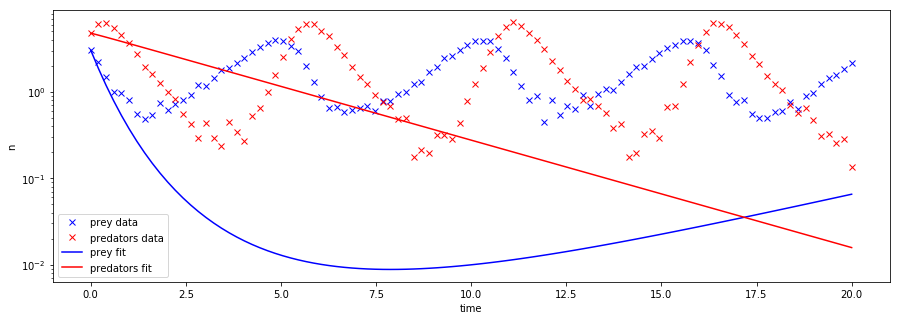

In [21]:
#print 'xList =', xList
#print 'yList =', yList
plt.figure(figsize=(15,5))
plt.plot(times,xValues,'x', label = 'prey data', color = 'b')
plt.plot(times,yValues,'x', label = 'predators data', color = 'r')
plt.plot(times,xList,label = 'prey fit', color = 'b')
plt.plot(times,yList, label = 'predators fit', color = 'r')
plt.yscale("log")
plt.xlabel('time')
plt.ylabel('n')
plt.legend()
plt.show()

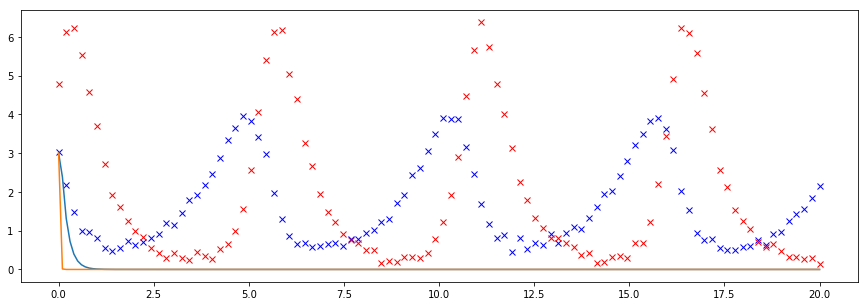

In [72]:
import numpy as np
from scipy.integrate import odeint
from scipy.spatial import distance
import matplotlib.pyplot as plt

def pend(f, t, a, b, c, d):
    x, y = f
    dfdt = [a*x - b*x*y, d*x*y - c*y]
    return dfdt
arr = [-5.9675538967234445, -6.900162295311295, 30.76471445139855, -7.830178541158306]
a = arr[0]
b = arr[1] 
c = arr[2]
d = arr[3]

y0 = [3, 3]
t = np.linspace(0, 20, 201)

sol = odeint(pend, y0, t, args=(a, b, c, d))

plt.figure(figsize=(15,5))
plt.plot(times,xValues,'x', label = 'prey data', color = 'b')
plt.plot(times,yValues,'x', label = 'predators data', color = 'r')
plt.plot(t, [el[0] for el in sol])
plt.plot(t, [el[1] for el in sol])
plt.show()
